# Імпорт модулів

In [155]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження файлу даних

In [156]:
df = pd.read_csv("bestsellers with categories.csv")
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [157]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [158]:
df = df.rename(
    columns={
        "Name": "name",
        "Author": "author",
        "User Rating": "user_rating",
        "Reviews": "reviews",
        "Price": "price",
        "Year": "year",
        "Genre": "genre",
    }
)
df

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


# 1. Первинне дослідження даних

### Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (`na`) у кожному зі стовпців (використовуйте функції `isna` та `sum`)


In [159]:
count_empty_values_Series = df.isna().sum(axis=0)
print(count_empty_values_Series)
print("- Чи у всіх рядків вистачає даних? ", 
      ['- Вистачає', '- Не вистачає'][int(count_empty_values_Series.all())], sep='\n')


name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64
- Чи у всіх рядків вистачає даних? 
- Вистачає


### Перевірте, які є унікальні значення в колонці genre (використовуйте функцію `unique`)

In [160]:
unique_genres = df['genre'].unique()
print('- Які є унікальні жанри? ', *map(lambda el: f"- {el}", unique_genres), sep='\n')

- Які є унікальні жанри? 
- Non Fiction
- Fiction


### Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте `kind='hist'`)

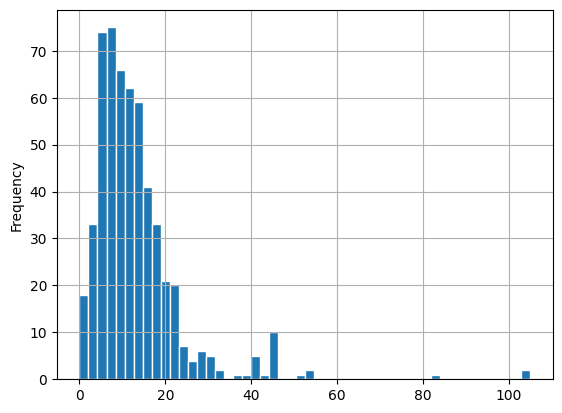

In [161]:
plot = df['price'].plot(kind='hist', bins=50, edgecolor="white", grid=True)
plt.show()

### Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції `max`, `min`, `mean`, `median`)

In [162]:
print(f"Max price: ", df['price'].max())
print(f"Min price: ",  df['price'].min())
print(f"Mean price: ",  df['price'].mean())
print(f"Price median: ",  df['price'].median())

Max price:  105
Min price:  0
Mean price:  13.1
Price median:  11.0


## 2. Пошук та сортування даних

### Який рейтинг у датасеті найвищий?

In [163]:
max_rating = df['user_rating'].max()
print('Відповідь: ', max_rating)

Відповідь:  4.9


### Скільки книг мають такий рейтинг?

In [172]:
count_max_rating = df['name'][(df['user_rating'] == max_rating)].unique().size
print('Відповідь: ', count_max_rating)

Відповідь:  28


### Яка книга має найбільше відгуків?

In [173]:
max_reviews = df[df.reviews == df.reviews.max()]
print('Відповідь:')
max_reviews

Відповідь:


,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


### З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?

In [174]:
top_50_in_2015 = df[df['year'] == 2015].sort_values(by='user_rating', ascending=False).drop_duplicates(subset='name').iloc[:50]
max_price_book = top_50_in_2015.nlargest(1, 'price')
max_price_book

,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


### Скільки книг жанру Fiction у 2010 році (використовуйте `&`)? 

In [187]:
count_fiction_rows = df[(df['year'] == 2010) & (df['genre'] == 'Fiction')].shape[0]
count_fiction_rows

20

### Скільки книг з рейтингом `4.9` потрапило до рейтингу у 2010 та 2011 роках (використовуйте `|` або функцію `isin`)?

In [196]:
df[((df['year'] == 2010) | (df['year'] == 2011)) & (df['user_rating'] == 4.9)].shape[0]


1

### Відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію `sort_values`).

Яка книга остання у відсортованому списку? 

In [198]:
df[(df['year'] == 2015) & (df['price'] < 8)].sort_values('price', ascending=False).iloc[-1]

name           To Kill a Mockingbird
author                    Harper Lee
user_rating                      4.8
reviews                        26234
price                              0
year                            2015
genre                        Fiction
Name: 507, dtype: object

## 3. Агрегування даних та з'єднання таблиць

### Яка максимальна та мінімальна ціни для кожного з жанрів (використовуйте функції  `groupby` та `agg`, для підрахунку мінімальних та максимальних значень використовуйте `max` та `min`).

In [206]:
df_genres_price = df.groupby("genre")["price"].agg(["min", "max"])
df_genres_price

,min,max
genre,,
Fiction,0,82
Non Fiction,0,105


In [212]:
print("Max Price for Fiction: ", df_genres_price.loc['Fiction']['max'])
print("Min Price for Fiction: ",  df_genres_price.loc['Fiction']['min'])
print("Max Price for Non Fiction: ", df_genres_price.loc['Non Fiction']['max'])
print("Min Price for Non Fiction: ",  df_genres_price.loc['Non Fiction']['min'])

Max Price for Fiction:  82
Min Price for Fiction:  0
Max Price for Non Fiction:  105
Min Price for Non Fiction:  0


### Створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції `groupby` та `agg`, для підрахунку кількості використовуйте `count`). Не беріть усі стовпці, виберете тільки потрібні

In [237]:
df_authors = df.groupby("author")['name'].agg(['count']).sort_values(by='count')

df_authors

,count
author,
Jill Twiss,1
Patrick Thorpe,1
Ian K. Smith M.D.,1
Howard Stern,1
Hopscotch Girls,1
...,...
American Psychological Association,10
Suzanne Collins,11
Gary Chapman,11


### Який автор має найбільше книг? Скільки книг?

In [265]:
print(df_authors.iloc[-1].name)
df_authors.iloc[-1][0]

Jeff Kinney


12